# Google Project - Cyclistic (Estudo de Caso)

#### Lucas Barretto

#### 2025-03-12

## Introdução

Este estudo de caso representa o projeto final da [Certificação
Profissional de Análise de Dados do
Google](https://www.coursera.org/account/accomplishments/specialization/C6VLHUG7QF97).

Este estudo consiste na análise de dados da empresa Cyclistic, uma
empresa de compartilhamento de bicicletas em Chicago, que opera cerca de
6000 bicicletas e quase 700 estações. A Cyclistic oferece dois tipos de
serviços: passes diários (viagem única ou dia inteiro) e assinaturas
anuais.

Os clientes com assinaturas anuais são denominados ‘membros Cyclistic’,
enquanto os que utilizam passes diários são chamados de ‘usuários
casuais’. A análise financeira da empresa revelou que os membros anuais
são mais lucrativos que os usuários casuais. Lily Moreno, Diretora de
Marketing da Cyclistic, acredita que aumentar o número de membros anuais
é crucial para o crescimento futuro da empresa. Ela propõe que, em vez
de focar em novos clientes, a empresa deve se concentrar em converter
usuários casuais em membros, já que esses usuários já estão
familiarizados com o serviço.

Para conduzir a análise de dados, seguirei as seis etapas recomendadas
pelo Google:

-   Perguntar (Ask)

-   Preparar (Prepare)

-   Processar (Process)

-   Analisar (Analyze)

-   Compartilhar (Share)

-   Agir (Act)

## Perguntar

Como dito anteriormente, o cenário deste estudo de caso é encima dos
dados da Cyclistic. Atualmene, a empresa oferece passes diários e
assinaturas anuais. Clientes com assinaturas anuais são chamados de
‘membros Cyclistic’, enquanto usuários de passes diários são ‘casuais’.
A partir da análise financeira chegou-se a conclusão de que membros
anuais são mais lucrativos e desenvolver uma estratégia de marketing
visando converter os usuários casuais em membros é essencial para o
crescimento da empresa. Diante disso, foram escolhidas três perguntas
para serem respondidas

1- Como os membros anuais e os ciclistas casuais utilizam as bicicletas
da Cyclistic de maneira diferente?

2 - Por que os ciclistas casuais comprariam assinaturas anuais da
Cyclistic?

3 - Como a Cyclistic pode usar mídia digital para influenciar os
ciclistas casuais a se tornarem membros?

Para este estudo em questão, foi definido que a pergunta a ser seguida
seria a primeira, sendo assim, o objetivo e o público foram definidos da
seguinte forma:

-   **Objetivo:** Entender como membros Cyclistic e os usuários casuais
    usam as bicicletas de maneira diferente.

-   **Público:** As partes interessadas são a diretoria de marketing e a
    equipe executiva da Cyclistic.

## Preparar

### Os dados

Para realizar este estudo de caso, utilizei os [dados históricos de
trajetos da
Cyclistic](https://divvy-tripdata.s3.amazonaws.com/index.html) para
analisar e identificar tendências. Diante disso, fiz o download dos
dados de trajetos da Cyclistic entre março de 2024 até fevereiro de
2025. que foram disponibilizados conforme este contrato de
[licença](https://divvybikes.com/data-license-agreement).

Os dados estão divididos em 12 arquivos, cada um referente a um mês do
ano (mar/2024 a fev/2025).

Os arquivos utilizados possuem a extensão .csv e representam os
registros de viagem utilizando as bicicletas da empresa.

O registro de cada viagem é composto por um ID (único) da viagem,
horário do início e término da viagem, localização das estações de
início e término da viagem, tipo de bicicleta utilizada e tipo de
usuário que realizou a viagem (casual ou membro).

inicialmente, comecei a minha análise instalando as bibliotecas que vou
utilizar durante o projeto.

### Instalando bibliotecas

``` r
library(readr)
library(tidyverse)
```

    ## ── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
    ## ✔ dplyr     1.1.4     ✔ purrr     1.0.4
    ## ✔ forcats   1.0.0     ✔ stringr   1.5.1
    ## ✔ ggplot2   3.5.1     ✔ tibble    3.2.1
    ## ✔ lubridate 1.9.4     ✔ tidyr     1.3.1
    ## ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
    ## ✖ dplyr::filter() masks stats::filter()
    ## ✖ dplyr::lag()    masks stats::lag()
    ## ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

``` r
library(ggplot2)
library(conflicted)
library(dplyr)
library(tidyr)

conflict_prefer("lag", "dplyr")
```

    ## [conflicted] Will prefer dplyr::lag over any other package.

``` r
conflict_prefer("filter", "dplyr")
```

    ## [conflicted] Will prefer dplyr::filter over any other package.

``` r
conflict_prefer("mutate", "dplyr")
```

    ## [conflicted] Will prefer dplyr::mutate over any other package.

Com as bibliotecas devidamente instaladas, agora vou começar a inserir
os dados que irei utilizar para a análise

### Inserindo dados

``` r
mar_2024 <- read.csv("~/Data Scicence Study/Projeto FInal/Google Analytics/Base de dados/202403-divvy-tripdata.csv")
abr_2024 <- read.csv("~/Data Scicence Study/Projeto FInal/Google Analytics/Base de dados/202404-divvy-tripdata.csv")
mai_2024 <- read.csv("~/Data Scicence Study/Projeto FInal/Google Analytics/Base de dados/202405-divvy-tripdata.csv")
jun_2024 <- read.csv("~/Data Scicence Study/Projeto FInal/Google Analytics/Base de dados/202406-divvy-tripdata.csv")
jul_2024 <- read.csv("~/Data Scicence Study/Projeto FInal/Google Analytics/Base de dados/202407-divvy-tripdata.csv")
ago_2024 <- read.csv("~/Data Scicence Study/Projeto FInal/Google Analytics/Base de dados/202408-divvy-tripdata.csv")
set_2024 <- read.csv("~/Data Scicence Study/Projeto FInal/Google Analytics/Base de dados/202409-divvy-tripdata.csv")
out_2024 <- read.csv("~/Data Scicence Study/Projeto FInal/Google Analytics/Base de dados/202410-divvy-tripdata.csv")
nov_2024 <- read.csv("~/Data Scicence Study/Projeto FInal/Google Analytics/Base de dados/202411-divvy-tripdata.csv")
dez_2024 <- read.csv("~/Data Scicence Study/Projeto FInal/Google Analytics/Base de dados/202412-divvy-tripdata.csv")
jan_2025 <- read.csv("~/Data Scicence Study/Projeto FInal/Google Analytics/Base de dados/202501-divvy-tripdata.csv")
fev_2025 <- read.csv("~/Data Scicence Study/Projeto FInal/Google Analytics/Base de dados/202502-divvy-tripdata.csv")
```

### Coletando uma amostra de nome para as colunas

``` r
colnames(mar_2024)
```

    ##  [1] "ride_id"            "rideable_type"      "started_at"        
    ##  [4] "ended_at"           "start_station_name" "start_station_id"  
    ##  [7] "end_station_name"   "end_station_id"     "start_lat"         
    ## [10] "start_lng"          "end_lat"            "end_lng"           
    ## [13] "member_casual"

### Avaliando se os nomes das colunas correspondem para todas as tabelas

``` r
identical(names(dez_2024), names(nov_2024))
```

    ## [1] TRUE

``` r
identical(names(dez_2024), names(out_2024))
```

    ## [1] TRUE

``` r
identical(names(dez_2024), names(set_2024))
```

    ## [1] TRUE

``` r
identical(names(dez_2024), names(ago_2024))
```

    ## [1] TRUE

``` r
identical(names(dez_2024), names(jul_2024))
```

    ## [1] TRUE

``` r
identical(names(dez_2024), names(jun_2024))
```

    ## [1] TRUE

``` r
identical(names(dez_2024), names(mai_2024))
```

    ## [1] TRUE

``` r
identical(names(dez_2024), names(abr_2024))
```

    ## [1] TRUE

``` r
identical(names(dez_2024), names(mar_2024))
```

    ## [1] TRUE

``` r
identical(names(dez_2024), names(fev_2025))
```

    ## [1] TRUE

``` r
identical(names(dez_2024), names(jan_2025))
```

    ## [1] TRUE

### Checando se os dados estão estruturados

``` r
str(mar_2024)
```

    ## 'data.frame':    301687 obs. of  13 variables:
    ##  $ ride_id           : chr  "64FBE3BAED5F29E6" "9991629435C5E20E" "E5C9FECD5B71BEBD" "4CEA3EC8906DAEA8" ...
    ##  $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
    ##  $ started_at        : chr  "2024-03-05 18:33:11" "2024-03-06 17:15:14" "2024-03-06 17:16:36" "2024-03-03 22:55:54" ...
    ##  $ ended_at          : chr  "2024-03-05 18:51:48" "2024-03-06 17:16:04" "2024-03-06 17:19:28" "2024-03-03 22:58:08" ...
    ##  $ start_station_name: chr  "" "" "" "" ...
    ##  $ start_station_id  : chr  "" "" "" "" ...
    ##  $ end_station_name  : chr  "" "" "" "" ...
    ##  $ end_station_id    : chr  "" "" "" "" ...
    ##  $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
    ##  $ start_lng         : num  -87.7 -87.6 -87.6 -87.6 -87.7 ...
    ##  $ end_lat           : num  42 41.9 41.9 41.9 41.9 ...
    ##  $ end_lng           : num  -87.7 -87.6 -87.6 -87.6 -87.7 ...
    ##  $ member_casual     : chr  "member" "member" "member" "member" ...

``` r
str(abr_2024)
```

    ## 'data.frame':    415025 obs. of  13 variables:
    ##  $ ride_id           : chr  "743252713F32516B" "BE90D33D2240C614" "D47BBDDE7C40DD61" "6684E760BF9EA9B5" ...
    ##  $ rideable_type     : chr  "classic_bike" "electric_bike" "classic_bike" "classic_bike" ...
    ##  $ started_at        : chr  "2024-04-22 19:08:21" "2024-04-11 06:19:24" "2024-04-20 11:13:13" "2024-04-04 18:39:20" ...
    ##  $ ended_at          : chr  "2024-04-22 19:12:56" "2024-04-11 06:22:21" "2024-04-20 11:29:31" "2024-04-04 18:43:06" ...
    ##  $ start_station_name: chr  "Aberdeen St & Jackson Blvd" "Aberdeen St & Jackson Blvd" "Sheridan Rd & Montrose Ave" "Aberdeen St & Jackson Blvd" ...
    ##  $ start_station_id  : chr  "13157" "13157" "TA1307000107" "13157" ...
    ##  $ end_station_name  : chr  "Desplaines St & Jackson Blvd" "Desplaines St & Jackson Blvd" "Ashland Ave & Belle Plaine Ave" "Desplaines St & Jackson Blvd" ...
    ##  $ end_station_id    : chr  "15539" "15539" "13249" "15539" ...
    ##  $ start_lat         : num  41.9 41.9 42 41.9 42 ...
    ##  $ start_lng         : num  -87.7 -87.7 -87.7 -87.7 -87.7 ...
    ##  $ end_lat           : num  41.9 41.9 42 41.9 41.9 ...
    ##  $ end_lng           : num  -87.6 -87.6 -87.7 -87.6 -87.6 ...
    ##  $ member_casual     : chr  "member" "member" "member" "member" ...

``` r
str(mai_2024)
```

    ## 'data.frame':    609493 obs. of  13 variables:
    ##  $ ride_id           : chr  "7D9F0CE9EC2A1297" "02EC47687411416F" "101370FB2D3402BE" "E97E396331ED6913" ...
    ##  $ rideable_type     : chr  "classic_bike" "classic_bike" "classic_bike" "electric_bike" ...
    ##  $ started_at        : chr  "2024-05-25 15:52:42" "2024-05-14 15:11:51" "2024-05-30 17:46:04" "2024-05-17 20:21:54" ...
    ##  $ ended_at          : chr  "2024-05-25 16:11:50" "2024-05-14 15:22:00" "2024-05-30 18:09:16" "2024-05-17 20:40:32" ...
    ##  $ start_station_name: chr  "Streeter Dr & Grand Ave" "Sheridan Rd & Greenleaf Ave" "Streeter Dr & Grand Ave" "Streeter Dr & Grand Ave" ...
    ##  $ start_station_id  : chr  "13022" "KA1504000159" "13022" "13022" ...
    ##  $ end_station_name  : chr  "Clark St & Elm St" "Sheridan Rd & Loyola Ave" "Wabash Ave & 9th St" "Sheffield Ave & Wellington Ave" ...
    ##  $ end_station_id    : chr  "TA1307000039" "RP-009" "TA1309000010" "TA1307000052" ...
    ##  $ start_lat         : num  41.9 42 41.9 41.9 41.9 ...
    ##  $ start_lng         : num  -87.6 -87.7 -87.6 -87.6 -87.6 ...
    ##  $ end_lat           : num  41.9 42 41.9 41.9 41.9 ...
    ##  $ end_lng           : num  -87.6 -87.7 -87.6 -87.7 -87.6 ...
    ##  $ member_casual     : chr  "casual" "casual" "member" "member" ...

``` r
str(jun_2024)
```

    ## 'data.frame':    710721 obs. of  13 variables:
    ##  $ ride_id           : chr  "CDE6023BE6B11D2F" "462B48CD292B6A18" "9CFB6A858D23ABF7" "6365EFEB64231153" ...
    ##  $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
    ##  $ started_at        : chr  "2024-06-11 17:20:06.289" "2024-06-11 17:19:21.567" "2024-06-11 17:25:27.089" "2024-06-11 11:53:50.769" ...
    ##  $ ended_at          : chr  "2024-06-11 17:21:39.464" "2024-06-11 17:19:36.377" "2024-06-11 17:30:13.035" "2024-06-11 12:08:13.382" ...
    ##  $ start_station_name: chr  "" "" "" "" ...
    ##  $ start_station_id  : chr  "" "" "" "" ...
    ##  $ end_station_name  : chr  "" "" "" "" ...
    ##  $ end_station_id    : chr  "" "" "" "" ...
    ##  $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
    ##  $ start_lng         : num  -87.7 -87.7 -87.7 -87.6 -87.6 ...
    ##  $ end_lat           : num  41.9 41.9 41.9 41.9 41.9 ...
    ##  $ end_lng           : num  -87.7 -87.7 -87.7 -87.6 -87.6 ...
    ##  $ member_casual     : chr  "casual" "casual" "casual" "casual" ...

``` r
str(jul_2024)
```

    ## 'data.frame':    748962 obs. of  13 variables:
    ##  $ ride_id           : chr  "2658E319B13141F9" "B2176315168A47CE" "C2A9D33DF7EBB422" "8BFEA406DF01D8AD" ...
    ##  $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
    ##  $ started_at        : chr  "2024-07-11 08:15:14.784" "2024-07-11 15:45:07.851" "2024-07-11 08:24:48.192" "2024-07-11 08:46:06.864" ...
    ##  $ ended_at          : chr  "2024-07-11 08:17:56.335" "2024-07-11 16:06:04.243" "2024-07-11 08:28:05.237" "2024-07-11 09:14:11.664" ...
    ##  $ start_station_name: chr  "" "" "" "" ...
    ##  $ start_station_id  : chr  "" "" "" "" ...
    ##  $ end_station_name  : chr  "" "" "" "" ...
    ##  $ end_station_id    : chr  "" "" "" "" ...
    ##  $ start_lat         : num  41.8 41.8 41.8 41.9 42 ...
    ##  $ start_lng         : num  -87.6 -87.6 -87.6 -87.6 -87.6 ...
    ##  $ end_lat           : num  41.8 41.8 41.8 41.9 41.9 ...
    ##  $ end_lng           : num  -87.6 -87.6 -87.6 -87.7 -87.6 ...
    ##  $ member_casual     : chr  "casual" "casual" "casual" "casual" ...

``` r
str(ago_2024)
```

    ## 'data.frame':    755639 obs. of  13 variables:
    ##  $ ride_id           : chr  "BAA154388A869E64" "8752245932EFF67A" "44DDF9F57A9A161F" "44AAAF069B0C78C3" ...
    ##  $ rideable_type     : chr  "classic_bike" "electric_bike" "classic_bike" "electric_bike" ...
    ##  $ started_at        : chr  "2024-08-02 13:35:14.403" "2024-08-02 15:33:13.965" "2024-08-16 15:44:06.233" "2024-08-19 18:47:11.855" ...
    ##  $ ended_at          : chr  "2024-08-02 13:48:24.426" "2024-08-02 15:55:23.865" "2024-08-16 15:57:52.109" "2024-08-19 18:56:33.269" ...
    ##  $ start_station_name: chr  "State St & Randolph St" "Franklin St & Monroe St" "Franklin St & Monroe St" "Clark St & Elm St" ...
    ##  $ start_station_id  : chr  "TA1305000029" "TA1309000007" "TA1309000007" "TA1307000039" ...
    ##  $ end_station_name  : chr  "Wabash Ave & 9th St" "Damen Ave & Cortland St" "Clark St & Elm St" "McClurg Ct & Ohio St" ...
    ##  $ end_station_id    : chr  "TA1309000010" "13133" "TA1307000039" "TA1306000029" ...
    ##  $ start_lat         : num  41.9 41.9 41.9 41.9 42 ...
    ##  $ start_lng         : num  -87.6 -87.6 -87.6 -87.6 -87.7 ...
    ##  $ end_lat           : num  41.9 41.9 41.9 41.9 42 ...
    ##  $ end_lng           : num  -87.6 -87.7 -87.6 -87.6 -87.7 ...
    ##  $ member_casual     : chr  "member" "member" "member" "member" ...

``` r
str(set_2024)
```

    ## 'data.frame':    821276 obs. of  13 variables:
    ##  $ ride_id           : chr  "31D38723D5A8665A" "67CB39987F4E895B" "DA61204FD26EC681" "06F160D46AF235DD" ...
    ##  $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
    ##  $ started_at        : chr  "2024-09-26 15:30:58.150" "2024-09-26 15:31:32.529" "2024-09-26 15:00:33.012" "2024-09-26 18:19:06.491" ...
    ##  $ ended_at          : chr  "2024-09-26 15:30:59.437" "2024-09-26 15:53:13.501" "2024-09-26 15:02:25.406" "2024-09-26 18:38:53.515" ...
    ##  $ start_station_name: chr  "" "" "" "" ...
    ##  $ start_station_id  : chr  "" "" "" "" ...
    ##  $ end_station_name  : chr  "" "" "" "" ...
    ##  $ end_station_id    : chr  "" "" "" "" ...
    ##  $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
    ##  $ start_lng         : num  -87.6 -87.6 -87.6 -87.6 -87.7 ...
    ##  $ end_lat           : num  41.9 41.9 41.9 41.9 41.9 ...
    ##  $ end_lng           : num  -87.6 -87.6 -87.6 -87.6 -87.6 ...
    ##  $ member_casual     : chr  "member" "member" "member" "member" ...

``` r
str(out_2024)
```

    ## 'data.frame':    616281 obs. of  13 variables:
    ##  $ ride_id           : chr  "4422E707103AA4FF" "19DB722B44CBE82F" "20AE2509FD68C939" "D0F17580AB9515A9" ...
    ##  $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
    ##  $ started_at        : chr  "2024-10-14 03:26:04.083" "2024-10-13 19:33:38.926" "2024-10-13 23:40:48.522" "2024-10-14 02:13:41.602" ...
    ##  $ ended_at          : chr  "2024-10-14 03:32:56.535" "2024-10-13 19:39:04.490" "2024-10-13 23:48:02.339" "2024-10-14 02:25:40.057" ...
    ##  $ start_station_name: chr  "" "" "" "" ...
    ##  $ start_station_id  : chr  "" "" "" "" ...
    ##  $ end_station_name  : chr  "" "" "" "" ...
    ##  $ end_station_id    : chr  "" "" "" "" ...
    ##  $ start_lat         : num  42 42 42 42 42 ...
    ##  $ start_lng         : num  -87.7 -87.7 -87.7 -87.7 -87.7 ...
    ##  $ end_lat           : num  42 42 42 42 42 ...
    ##  $ end_lng           : num  -87.7 -87.7 -87.7 -87.7 -87.7 ...
    ##  $ member_casual     : chr  "member" "member" "member" "member" ...

``` r
str(nov_2024)
```

    ## 'data.frame':    335075 obs. of  13 variables:
    ##  $ ride_id           : chr  "578DDD7CE1771FFA" "78B141C50102ABA6" "1E794CF36394E2D7" "E5DD2CAB58D73F98" ...
    ##  $ rideable_type     : chr  "classic_bike" "classic_bike" "classic_bike" "classic_bike" ...
    ##  $ started_at        : chr  "2024-11-07 19:21:58.206" "2024-11-22 14:49:00.431" "2024-11-08 09:24:00.238" "2024-11-24 17:51:14.144" ...
    ##  $ ended_at          : chr  "2024-11-07 19:28:57.301" "2024-11-22 14:56:15.475" "2024-11-08 09:28:33.480" "2024-11-24 18:05:32.574" ...
    ##  $ start_station_name: chr  "Walsh Park" "Walsh Park" "Walsh Park" "Clark St & Elm St" ...
    ##  $ start_station_id  : chr  "18067" "18067" "18067" "TA1307000039" ...
    ##  $ end_station_name  : chr  "Leavitt St & North Ave" "Leavitt St & Armitage Ave" "Damen Ave & Cortland St" "Clark St & Drummond Pl" ...
    ##  $ end_station_id    : chr  "TA1308000005" "TA1309000029" "13133" "TA1307000142" ...
    ##  $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
    ##  $ start_lng         : num  -87.7 -87.7 -87.7 -87.6 -87.6 ...
    ##  $ end_lat           : num  41.9 41.9 41.9 41.9 41.9 ...
    ##  $ end_lng           : num  -87.7 -87.7 -87.7 -87.6 -87.6 ...
    ##  $ member_casual     : chr  "member" "member" "member" "member" ...

``` r
str(dez_2024)
```

    ## 'data.frame':    178372 obs. of  13 variables:
    ##  $ ride_id           : chr  "6C960DEB4F78854E" "C0913EEB2834E7A2" "848A37DD4723078A" "3FA09C762ECB48BD" ...
    ##  $ rideable_type     : chr  "electric_bike" "classic_bike" "classic_bike" "electric_bike" ...
    ##  $ started_at        : chr  "2024-12-31 01:38:35.018" "2024-12-21 18:41:26.478" "2024-12-21 11:41:01.664" "2024-12-26 13:07:27.526" ...
    ##  $ ended_at          : chr  "2024-12-31 01:48:45.775" "2024-12-21 18:47:33.871" "2024-12-21 11:52:45.094" "2024-12-26 13:10:54.130" ...
    ##  $ start_station_name: chr  "Halsted St & Roscoe St" "Clark St & Wellington Ave" "Sheridan Rd & Montrose Ave" "Aberdeen St & Jackson Blvd" ...
    ##  $ start_station_id  : chr  "TA1309000025" "TA1307000136" "TA1307000107" "13157" ...
    ##  $ end_station_name  : chr  "Clark St & Winnemac Ave" "Halsted St & Roscoe St" "Broadway & Barry Ave" "Green St & Randolph St*" ...
    ##  $ end_station_id    : chr  "TA1309000035" "TA1309000025" "13137" "chargingstx3" ...
    ##  $ start_lat         : num  41.9 41.9 42 41.9 41.9 ...
    ##  $ start_lng         : num  -87.6 -87.6 -87.7 -87.7 -87.7 ...
    ##  $ end_lat           : num  42 41.9 41.9 41.9 41.9 ...
    ##  $ end_lng           : num  -87.7 -87.6 -87.6 -87.6 -87.7 ...
    ##  $ member_casual     : chr  "member" "member" "member" "member" ...

``` r
str(jan_2025)
```

    ## 'data.frame':    138689 obs. of  13 variables:
    ##  $ ride_id           : chr  "7569BC890583FCD7" "013609308856B7FC" "EACACD3CE0607C0D" "EAA2485BA64710D3" ...
    ##  $ rideable_type     : chr  "classic_bike" "electric_bike" "classic_bike" "classic_bike" ...
    ##  $ started_at        : chr  "2025-01-21 17:23:54.538" "2025-01-11 15:44:06.795" "2025-01-02 15:16:27.730" "2025-01-23 08:49:05.814" ...
    ##  $ ended_at          : chr  "2025-01-21 17:37:52.015" "2025-01-11 15:49:11.139" "2025-01-02 15:28:03.230" "2025-01-23 08:52:40.047" ...
    ##  $ start_station_name: chr  "Wacker Dr & Washington St" "Halsted St & Wrightwood Ave" "Southport Ave & Waveland Ave" "Southport Ave & Waveland Ave" ...
    ##  $ start_station_id  : chr  "KA1503000072" "TA1309000061" "13235" "13235" ...
    ##  $ end_station_name  : chr  "McClurg Ct & Ohio St" "Racine Ave & Belmont Ave" "Broadway & Cornelia Ave" "Southport Ave & Roscoe St" ...
    ##  $ end_station_id    : chr  "TA1306000029" "TA1308000019" "13278" "13071" ...
    ##  $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
    ##  $ start_lng         : num  -87.6 -87.6 -87.7 -87.7 -87.7 ...
    ##  $ end_lat           : num  41.9 41.9 41.9 41.9 41.9 ...
    ##  $ end_lng           : num  -87.6 -87.7 -87.6 -87.7 -87.7 ...
    ##  $ member_casual     : chr  "member" "member" "member" "member" ...

``` r
str(fev_2025)
```

    ## 'data.frame':    151880 obs. of  13 variables:
    ##  $ ride_id           : chr  "A246CA24873F7C5C" "303C0906F3F068AE" "A0F65F3531F1FB2B" "CE663C815B6A6D73" ...
    ##  $ rideable_type     : chr  "classic_bike" "classic_bike" "electric_bike" "electric_bike" ...
    ##  $ started_at        : chr  "2025-02-25 21:21:21.171" "2025-02-08 14:55:13.493" "2025-02-24 00:32:56.553" "2025-02-07 17:00:38.646" ...
    ##  $ ended_at          : chr  "2025-02-25 21:30:09.941" "2025-02-08 15:13:39.890" "2025-02-24 00:38:21.711" "2025-02-07 17:34:29.012" ...
    ##  $ start_station_name: chr  "Michigan Ave & Lake St" "Ogden Ave & Race Ave" "Michigan Ave & Lake St" "Ogden Ave & Race Ave" ...
    ##  $ start_station_id  : chr  "TA1305000011" "13194" "TA1305000011" "13194" ...
    ##  $ end_station_name  : chr  "Clark St & Elm St" "Clark St & Elm St" "Wabash Ave & 9th St" "Clark St & Elm St" ...
    ##  $ end_station_id    : chr  "TA1307000039" "TA1307000039" "TA1309000010" "TA1307000039" ...
    ##  $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
    ##  $ start_lng         : num  -87.6 -87.7 -87.6 -87.7 -87.6 ...
    ##  $ end_lat           : num  41.9 41.9 41.9 41.9 41.9 ...
    ##  $ end_lng           : num  -87.6 -87.6 -87.6 -87.6 -87.6 ...
    ##  $ member_casual     : chr  "member" "member" "casual" "casual" ...

A partir do resultado obtido, nota-se que os dados estão padronizados

### Segunda checagem

``` r
janitor::compare_df_cols(dez_2024, nov_2024, return = "mismatch")
```

    ## [1] column_name dez_2024    nov_2024   
    ## <0 linhas> (ou row.names de comprimento 0)

``` r
janitor::compare_df_cols(dez_2024, out_2024, return = "mismatch")
```

    ## [1] column_name dez_2024    out_2024   
    ## <0 linhas> (ou row.names de comprimento 0)

``` r
janitor::compare_df_cols(dez_2024, set_2024, return = "mismatch")
```

    ## [1] column_name dez_2024    set_2024   
    ## <0 linhas> (ou row.names de comprimento 0)

``` r
janitor::compare_df_cols(dez_2024, ago_2024, return = "mismatch")
```

    ## [1] column_name dez_2024    ago_2024   
    ## <0 linhas> (ou row.names de comprimento 0)

``` r
janitor::compare_df_cols(dez_2024, jul_2024, return = "mismatch")
```

    ## [1] column_name dez_2024    jul_2024   
    ## <0 linhas> (ou row.names de comprimento 0)

``` r
janitor::compare_df_cols(dez_2024, jun_2024, return = "mismatch")
```

    ## [1] column_name dez_2024    jun_2024   
    ## <0 linhas> (ou row.names de comprimento 0)

``` r
janitor::compare_df_cols(dez_2024, mai_2024, return = "mismatch")
```

    ## [1] column_name dez_2024    mai_2024   
    ## <0 linhas> (ou row.names de comprimento 0)

``` r
janitor::compare_df_cols(dez_2024, abr_2024, return = "mismatch")
```

    ## [1] column_name dez_2024    abr_2024   
    ## <0 linhas> (ou row.names de comprimento 0)

``` r
janitor::compare_df_cols(dez_2024, mar_2024, return = "mismatch")
```

    ## [1] column_name dez_2024    mar_2024   
    ## <0 linhas> (ou row.names de comprimento 0)

``` r
janitor::compare_df_cols(dez_2024, jan_2025, return = "mismatch")
```

    ## [1] column_name dez_2024    jan_2025   
    ## <0 linhas> (ou row.names de comprimento 0)

``` r
janitor::compare_df_cols(dez_2024, fev_2025, return = "mismatch")
```

    ## [1] column_name dez_2024    fev_2025   
    ## <0 linhas> (ou row.names de comprimento 0)

### Gerando um DataFrame único com os dados

Agora que tenho certeza de que os dados estão padronizados, agora posso
uni-los em apenas uma tabela para facilitar a nossa análise. Para
realizar a junção, irei utilizar a função bind_rows().

``` r
cyclistic <- bind_rows(mar_2024, abr_2024, mai_2024, jun_2024, jul_2024, ago_2024, set_2024, out_2024, nov_2024, dez_2024, jan_2025, fev_2025)
```

## Processar

### Processando os Dados

``` r
head(cyclistic)
```

    ##            ride_id rideable_type          started_at            ended_at
    ## 1 64FBE3BAED5F29E6 electric_bike 2024-03-05 18:33:11 2024-03-05 18:51:48
    ## 2 9991629435C5E20E electric_bike 2024-03-06 17:15:14 2024-03-06 17:16:04
    ## 3 E5C9FECD5B71BEBD electric_bike 2024-03-06 17:16:36 2024-03-06 17:19:28
    ## 4 4CEA3EC8906DAEA8 electric_bike 2024-03-03 22:55:54 2024-03-03 22:58:08
    ## 5 77266B408503C55F electric_bike 2024-03-17 11:15:18 2024-03-17 11:31:18
    ## 6 E81C25D251767135 electric_bike 2024-03-29 14:40:49 2024-03-29 14:58:11
    ##   start_station_name start_station_id end_station_name end_station_id start_lat
    ## 1                                                                         41.94
    ## 2                                                                         41.91
    ## 3                                                                         41.91
    ## 4                                                                         41.90
    ## 5                                                                         41.93
    ## 6                                                                         41.93
    ##   start_lng end_lat end_lng member_casual
    ## 1    -87.65   41.96  -87.65        member
    ## 2    -87.64   41.91  -87.64        member
    ## 3    -87.64   41.92  -87.64        member
    ## 4    -87.63   41.89  -87.63        member
    ## 5    -87.70   41.93  -87.72        member
    ## 6    -87.70   41.95  -87.68        member

### Contagem de linhas após a junção

``` r
nrow(cyclistic)
```

    ## [1] 5783100

### Avaliação dos dados

``` r
str(cyclistic)
```

    ## 'data.frame':    5783100 obs. of  13 variables:
    ##  $ ride_id           : chr  "64FBE3BAED5F29E6" "9991629435C5E20E" "E5C9FECD5B71BEBD" "4CEA3EC8906DAEA8" ...
    ##  $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
    ##  $ started_at        : chr  "2024-03-05 18:33:11" "2024-03-06 17:15:14" "2024-03-06 17:16:36" "2024-03-03 22:55:54" ...
    ##  $ ended_at          : chr  "2024-03-05 18:51:48" "2024-03-06 17:16:04" "2024-03-06 17:19:28" "2024-03-03 22:58:08" ...
    ##  $ start_station_name: chr  "" "" "" "" ...
    ##  $ start_station_id  : chr  "" "" "" "" ...
    ##  $ end_station_name  : chr  "" "" "" "" ...
    ##  $ end_station_id    : chr  "" "" "" "" ...
    ##  $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
    ##  $ start_lng         : num  -87.7 -87.6 -87.6 -87.6 -87.7 ...
    ##  $ end_lat           : num  42 41.9 41.9 41.9 41.9 ...
    ##  $ end_lng           : num  -87.7 -87.6 -87.6 -87.6 -87.7 ...
    ##  $ member_casual     : chr  "member" "member" "member" "member" ...

A partir da primeira vizualização, notei que havia a presença de valores
vazios dentro da minha tabela, que por sua vez, podem ser prejudiciais
paraa minha análise. Para isso, usarei a função drop_na() para limpar os
dados vazios

### Limpando dados Vazios

``` r
cyclistic <- drop_na(cyclistic)
```

### Contagem de linhas após a limpeza

``` r
nrow(cyclistic)
```

    ## [1] 5776356

### Visualizando quais colunas possuem valores NA

``` r
colSums(is.na(cyclistic))
```

    ##            ride_id      rideable_type         started_at           ended_at 
    ##                  0                  0                  0                  0 
    ## start_station_name   start_station_id   end_station_name     end_station_id 
    ##                  0                  0                  0                  0 
    ##          start_lat          start_lng            end_lat            end_lng 
    ##                  0                  0                  0                  0 
    ##      member_casual 
    ##                  0

### Convertendo colunas numéricas corretamente

Os valores vazios podem ser espaços em branco (” “) ou NA_character\_ e
não NA. Para isso, precisarei converter todas as colunas numéricas para
numeric e as colunas categóricas para character, e posteriormente
aplicar o drop_na() para realizar a limpeza dos dados vazios

``` r
cyclistic <- cyclistic %>%
  mutate(across(where(is.character), ~na_if(.x, ""))) %>%
  mutate(across(where(is.character), ~na_if(.x, "NA"))) %>%
  mutate(across(c(start_lat, start_lng, end_lat, end_lng), as.numeric))
```

``` r
cyclistic <- drop_na(cyclistic)
```

### Avaliando o resultado da limpeza

``` r
str(cyclistic)
```

    ## 'data.frame':    4120574 obs. of  13 variables:
    ##  $ ride_id           : chr  "391B0EFEC1CE3771" "44E934751422D15C" "B725414CC16E5744" "76B839D9F5347C44" ...
    ##  $ rideable_type     : chr  "electric_bike" "classic_bike" "classic_bike" "classic_bike" ...
    ##  $ started_at        : chr  "2024-03-09 17:36:21" "2024-03-21 18:40:56" "2024-03-02 09:16:18" "2024-03-10 13:58:34" ...
    ##  $ ended_at          : chr  "2024-03-09 17:36:45" "2024-03-21 18:42:14" "2024-03-02 09:25:17" "2024-03-10 14:29:33" ...
    ##  $ start_station_name: chr  "Morgan Ave & 14th Pl" "Campbell Ave & Montrose Ave" "California Ave & Milwaukee Ave" "Cottage Grove Ave & 51st St" ...
    ##  $ start_station_id  : chr  "TA1306000002" "15623" "13084" "TA1309000067" ...
    ##  $ end_station_name  : chr  "Morgan Ave & 14th Pl" "Campbell Ave & Montrose Ave" "California Ave & Milwaukee Ave" "Cottage Grove Ave & 51st St" ...
    ##  $ end_station_id    : chr  "TA1306000002" "15623" "13084" "TA1309000067" ...
    ##  $ start_lat         : num  41.9 42 41.9 41.8 41.8 ...
    ##  $ start_lng         : num  -87.7 -87.7 -87.7 -87.6 -87.6 ...
    ##  $ end_lat           : num  41.9 42 41.9 41.8 41.8 ...
    ##  $ end_lng           : num  -87.7 -87.7 -87.7 -87.6 -87.6 ...
    ##  $ member_casual     : chr  "member" "member" "member" "member" ...

``` r
head(cyclistic)
```

    ##            ride_id rideable_type          started_at            ended_at
    ## 1 391B0EFEC1CE3771 electric_bike 2024-03-09 17:36:21 2024-03-09 17:36:45
    ## 2 44E934751422D15C  classic_bike 2024-03-21 18:40:56 2024-03-21 18:42:14
    ## 3 B725414CC16E5744  classic_bike 2024-03-02 09:16:18 2024-03-02 09:25:17
    ## 4 76B839D9F5347C44  classic_bike 2024-03-10 13:58:34 2024-03-10 14:29:33
    ## 5 00C4D395FD14750F  classic_bike 2024-03-29 14:19:57 2024-03-29 14:46:08
    ## 6 78C7623DDE52F64D  classic_bike 2024-03-10 21:45:08 2024-03-10 21:45:19
    ##               start_station_name start_station_id
    ## 1           Morgan Ave & 14th Pl     TA1306000002
    ## 2    Campbell Ave & Montrose Ave            15623
    ## 3 California Ave & Milwaukee Ave            13084
    ## 4    Cottage Grove Ave & 51st St     TA1309000067
    ## 5    Cottage Grove Ave & 51st St     TA1309000067
    ## 6 California Ave & Milwaukee Ave            13084
    ##                 end_station_name end_station_id start_lat start_lng  end_lat
    ## 1           Morgan Ave & 14th Pl   TA1306000002  41.86242 -87.65109 41.86238
    ## 2    Campbell Ave & Montrose Ave          15623  41.96152 -87.69118 41.96152
    ## 3 California Ave & Milwaukee Ave          13084  41.92269 -87.69715 41.92269
    ## 4    Cottage Grove Ave & 51st St   TA1309000067  41.80304 -87.60662 41.80304
    ## 5    Cottage Grove Ave & 51st St   TA1309000067  41.80304 -87.60662 41.80304
    ## 6 California Ave & Milwaukee Ave          13084  41.92269 -87.69715 41.92269
    ##     end_lng member_casual
    ## 1 -87.65106        member
    ## 2 -87.69118        member
    ## 3 -87.69715        member
    ## 4 -87.60662        member
    ## 5 -87.60662        member
    ## 6 -87.69715        member

``` r
nrow(cyclistic)
```

    ## [1] 4120574

Agora que conseguimos retirar os valores nulos, como esta base retrata o
uso das bicicletas a partir do ID do passseio, não pode haver a preseça
de um registro de ID do passeio duplicado

### Análise de valores duplicados

Para realizar esta análise, contei a quantidade de valores únicos
presentes na coluna “ride_id” através da função “lenght()”, e
posteriormente, fiz um código para conferir quantas duplicatas existem
antes de removê-las.

``` r
length(unique(cyclistic$ride_id))
```

    ## [1] 4120453

``` r
cyclistic %>% 
  group_by(ride_id) %>% 
  filter(n() > 1)
```

    ## # A tibble: 242 × 13
    ## # Groups:   ride_id [121]
    ##    ride_id rideable_type started_at ended_at start_station_name start_station_id
    ##    <chr>   <chr>         <chr>      <chr>    <chr>              <chr>           
    ##  1 2C772E… electric_bike 2024-05-3… 2024-06… Dearborn St & Van… 624             
    ##  2 7BC67F… classic_bike  2024-05-3… 2024-06… Burnham Harbor     15545           
    ##  3 43CD52… electric_bike 2024-05-3… 2024-06… Wentworth Ave & C… chargingstx07   
    ##  4 ABBD88… electric_bike 2024-05-3… 2024-06… McClurg Ct & Erie… KA1503000041    
    ##  5 CA12CC… classic_bike  2024-05-3… 2024-06… Halsted St & Arch… TA1308000013    
    ##  6 171D1A… classic_bike  2024-05-3… 2024-06… Streeter Dr & Gra… 13022           
    ##  7 D2D163… classic_bike  2024-05-3… 2024-06… Wells St & Concor… TA1308000050    
    ##  8 BB8229… classic_bike  2024-05-3… 2024-06… Lakefront Trail &… 15576           
    ##  9 43F5E0… classic_bike  2024-05-3… 2024-06… Streeter Dr & Gra… 13022           
    ## 10 498F8D… electric_bike 2024-05-3… 2024-06… Wells St & Instit… 22001           
    ## # ℹ 232 more rows
    ## # ℹ 7 more variables: end_station_name <chr>, end_station_id <chr>,
    ## #   start_lat <dbl>, start_lng <dbl>, end_lat <dbl>, end_lng <dbl>,
    ## #   member_casual <chr>

A partir da análise realizada, ficou evidente a presença de valores
duplicados. Para corrigir isso, usarei a função distinct() para retirar
os ID’s duplicados e verifiquei se a quantidade de linhas com os valores
únicos na coluna “ride_id” condiz com a quantidade de valores calculada
anteriormente

``` r
cyclistic <- cyclistic %>% distinct(ride_id, .keep_all = TRUE)
```

``` r
cyclistic %>% 
  group_by(ride_id) %>% 
  filter(n() > 1)
```

    ## # A tibble: 0 × 13
    ## # Groups:   ride_id [0]
    ## # ℹ 13 variables: ride_id <chr>, rideable_type <chr>, started_at <chr>,
    ## #   ended_at <chr>, start_station_name <chr>, start_station_id <chr>,
    ## #   end_station_name <chr>, end_station_id <chr>, start_lat <dbl>,
    ## #   start_lng <dbl>, end_lat <dbl>, end_lng <dbl>, member_casual <chr>

``` r
registros_sujos = 5783100 - 4120453
porcentual_valores_sujos = (registros_sujos / 5783100) * 100
print(registros_sujos)
```

    ## [1] 1662647

``` r
print(porcentual_valores_sujos)
```

    ## [1] 28.7501

Com o térimo da limpeza, foi removido um total de 1662647 linhas com
valores NA ou duplicados. O que corresponde a 28,75% do dataframe
original

## Analisar

### Análise do estudo de caso

Vizando responder a pergunta definida inicialmente “Como os membros
anuais e os ciclistas casuais utilizam as bicicletas da Cyclistic de
maneira diferente?”, foram selecionadas as seguintes perguntas para a
análise:

-   Qual a duração média das viagens de cada grupo?

-   A duração média varia conforme os dias da semana ou meses do ano?

-   Qual o número total de viagens de cada grupo?

-   Qual o percentual de viagens feitas por membros versus casuais?

-   O que os clientes casuais mais usam? Bicicletas elétricas ou a
    bicicleta clássica?

### Criando novas colunas:

Para responder as perguntas, Vou precisar novas colunas baseadas na Data
e Hora de saída. Para trabalhar com data e hora usei o pacote lubridate.

Vou criar as seguintes colunas:

hora_saida: representa o horário em que a bicicleta saiu da base.

mes_saida: representa o mês em que a bicicleta saiu da base.

dia_saida: representa o dia em que a bicicleta saiu da base.

dia_da_semana_saida: representa o dia da semana - de segunda a domingo -
em que a bicicleta saiu da base.

duracao: representa a duração da viagem.

``` r
colnames(cyclistic)
```

    ##  [1] "ride_id"            "rideable_type"      "started_at"        
    ##  [4] "ended_at"           "start_station_name" "start_station_id"  
    ##  [7] "end_station_name"   "end_station_id"     "start_lat"         
    ## [10] "start_lng"          "end_lat"            "end_lng"           
    ## [13] "member_casual"

``` r
cyclistic$date <- as.Date(cyclistic$started_at) # O formato padrão é yyyy-mm-dd
cyclistic$month <- format(as.Date(cyclistic$date), "%m")
cyclistic$day <- format(as.Date(cyclistic$date), "%d")
cyclistic$year <- format(as.Date(cyclistic$date), "%Y")
cyclistic$day_of_week <- format(as.Date(cyclistic$date), "%A")
cyclistic_2022hora_saida <- lubridate::hour(cyclistic$ended_at)
```

### Criando a coluna para calcular a duração da viagem em segundos

``` r
cyclistic$ride_length <- difftime(cyclistic$ended_at, cyclistic$started_at)
```

``` r
str(cyclistic)
```

    ## 'data.frame':    4120453 obs. of  19 variables:
    ##  $ ride_id           : chr  "391B0EFEC1CE3771" "44E934751422D15C" "B725414CC16E5744" "76B839D9F5347C44" ...
    ##  $ rideable_type     : chr  "electric_bike" "classic_bike" "classic_bike" "classic_bike" ...
    ##  $ started_at        : chr  "2024-03-09 17:36:21" "2024-03-21 18:40:56" "2024-03-02 09:16:18" "2024-03-10 13:58:34" ...
    ##  $ ended_at          : chr  "2024-03-09 17:36:45" "2024-03-21 18:42:14" "2024-03-02 09:25:17" "2024-03-10 14:29:33" ...
    ##  $ start_station_name: chr  "Morgan Ave & 14th Pl" "Campbell Ave & Montrose Ave" "California Ave & Milwaukee Ave" "Cottage Grove Ave & 51st St" ...
    ##  $ start_station_id  : chr  "TA1306000002" "15623" "13084" "TA1309000067" ...
    ##  $ end_station_name  : chr  "Morgan Ave & 14th Pl" "Campbell Ave & Montrose Ave" "California Ave & Milwaukee Ave" "Cottage Grove Ave & 51st St" ...
    ##  $ end_station_id    : chr  "TA1306000002" "15623" "13084" "TA1309000067" ...
    ##  $ start_lat         : num  41.9 42 41.9 41.8 41.8 ...
    ##  $ start_lng         : num  -87.7 -87.7 -87.7 -87.6 -87.6 ...
    ##  $ end_lat           : num  41.9 42 41.9 41.8 41.8 ...
    ##  $ end_lng           : num  -87.7 -87.7 -87.7 -87.6 -87.6 ...
    ##  $ member_casual     : chr  "member" "member" "member" "member" ...
    ##  $ date              : Date, format: "2024-03-09" "2024-03-21" ...
    ##  $ month             : chr  "03" "03" "03" "03" ...
    ##  $ day               : chr  "09" "21" "02" "10" ...
    ##  $ year              : chr  "2024" "2024" "2024" "2024" ...
    ##  $ day_of_week       : chr  "sábado" "quinta-feira" "sábado" "domingo" ...
    ##  $ ride_length       : 'difftime' num  24 78 539 1859 ...
    ##   ..- attr(*, "units")= chr "secs"

``` r
head(cyclistic)
```

    ##            ride_id rideable_type          started_at            ended_at
    ## 1 391B0EFEC1CE3771 electric_bike 2024-03-09 17:36:21 2024-03-09 17:36:45
    ## 2 44E934751422D15C  classic_bike 2024-03-21 18:40:56 2024-03-21 18:42:14
    ## 3 B725414CC16E5744  classic_bike 2024-03-02 09:16:18 2024-03-02 09:25:17
    ## 4 76B839D9F5347C44  classic_bike 2024-03-10 13:58:34 2024-03-10 14:29:33
    ## 5 00C4D395FD14750F  classic_bike 2024-03-29 14:19:57 2024-03-29 14:46:08
    ## 6 78C7623DDE52F64D  classic_bike 2024-03-10 21:45:08 2024-03-10 21:45:19
    ##               start_station_name start_station_id
    ## 1           Morgan Ave & 14th Pl     TA1306000002
    ## 2    Campbell Ave & Montrose Ave            15623
    ## 3 California Ave & Milwaukee Ave            13084
    ## 4    Cottage Grove Ave & 51st St     TA1309000067
    ## 5    Cottage Grove Ave & 51st St     TA1309000067
    ## 6 California Ave & Milwaukee Ave            13084
    ##                 end_station_name end_station_id start_lat start_lng  end_lat
    ## 1           Morgan Ave & 14th Pl   TA1306000002  41.86242 -87.65109 41.86238
    ## 2    Campbell Ave & Montrose Ave          15623  41.96152 -87.69118 41.96152
    ## 3 California Ave & Milwaukee Ave          13084  41.92269 -87.69715 41.92269
    ## 4    Cottage Grove Ave & 51st St   TA1309000067  41.80304 -87.60662 41.80304
    ## 5    Cottage Grove Ave & 51st St   TA1309000067  41.80304 -87.60662 41.80304
    ## 6 California Ave & Milwaukee Ave          13084  41.92269 -87.69715 41.92269
    ##     end_lng member_casual       date month day year  day_of_week ride_length
    ## 1 -87.65106        member 2024-03-09    03  09 2024       sábado     24 secs
    ## 2 -87.69118        member 2024-03-21    03  21 2024 quinta-feira     78 secs
    ## 3 -87.69715        member 2024-03-02    03  02 2024       sábado    539 secs
    ## 4 -87.60662        member 2024-03-10    03  10 2024      domingo   1859 secs
    ## 5 -87.60662        member 2024-03-29    03  29 2024  sexta-feira   1571 secs
    ## 6 -87.69715        member 2024-03-10    03  10 2024      domingo     11 secs

### Converta “ride_length” de Factor para numérico

Para que possamos realizar cálculos com os valores da coluna
“ride_length”, será necessário converter os valores desta coluna para
numérico

``` r
cyclistic$ride_length <- as.numeric(as.character(cyclistic$ride_length))
 is.numeric(cyclistic$ride_length)
```

    ## [1] TRUE

Vizando garantir a qualidade dos dados para a análise, resolvi realizar
uma segunda limpeza, desta vez, na coluna “ride_length”

``` r
cyclistic_v2 <- cyclistic[!(cyclistic$ride_length <= 0 | cyclistic$ride_length == ""),]
```

Por fim, irei verificar a quantidade de linhas que foram retiradas do
dataframe

``` r
nrow(cyclistic_v2)
```

    ## [1] 4120275

### Fazendo análise descritiva

Agora, vamos iniciar a análise dos dados para descobrir as histórias que
eles revelam sobre como cada grupo de usuários utiliza as bicicletas da
Cyclistic. O objetivo é identificar padrões e comportamentos que possam
ajudar a entender melhor as necessidades e preferências dos ciclistas,
contribuindo para decisões mais informadas e estratégicas.

### Análise descritiva em ride_length (todos os números em segundos)

``` r
mean(cyclistic_v2$ride_length) # Média
```

    ## [1] 996.4858

``` r
median(cyclistic_v2$ride_length) # Mediana
```

    ## [1] 607.768

``` r
max(cyclistic_v2$ride_length) # Maior Corrida
```

    ## [1] 90562

``` r
min(cyclistic_v2$ride_length) # Menor Corrida
```

    ## [1] 0.1030002

``` r
summary(cyclistic_v2$ride_length)
```

    ##    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    ##     0.1   349.3   607.8   996.5  1093.0 90562.0

### Análise descritiva em ride_length (todos os números em minutos)

``` r
mean(cyclistic_v2$ride_length)/60 #straight average (total ride length / rides)
```

    ## [1] 16.6081

``` r
median(cyclistic_v2$ride_length)/60 #midpoint number in the ascending array of ride lengths
```

    ## [1] 10.12947

``` r
max(cyclistic_v2$ride_length)/60 #longest ride
```

    ## [1] 1509.367

``` r
min(cyclistic_v2$ride_length)/60 #shortest ride
```

    ## [1] 0.001716669

Resultados:

-   Tempo médio das viagens: 16,61 minutos.
-   Mediana do tempo de viagens: 10,13 minutos.
-   Duração Máxima de uma viagem: 1509 minutos (aproximadamente 24
    dias).
-   Menor duração de viagem: 1 segundo.

Utilizando o dataframe (cyclistic), agrupei os dados por tipo de usuário
(tipo_usuario) e apliquei a função summarise() para obter a duração
média das viagens (duracao_media) e o número total de viagens
(num_viagens) realizadas por cada grupo. Para otimizar o processo,
empreguei o operador pipe (%\>%), que será uma ferramenta essencial ao
longo do projeto.

``` r
duracao_media <- cyclistic_v2 %>% 
  group_by(member_casual) %>% 
  summarise(duracao_media_min = mean(ride_length)/60, num_viagens = length(ride_length)) # duracao_media em minutos (por isso divisao por 60 para converter segundos em minutos) e num_viagens é o número total de registros no dataframe, no caso para cada grupo
print(duracao_media)
```

    ## # A tibble: 2 × 3
    ##   member_casual duracao_media_min num_viagens
    ##   <chr>                     <dbl>       <int>
    ## 1 casual                     24.0     1502330
    ## 2 member                     12.4     2617945

### Resultados

-   A média da duração da utilização das bicicletas dos usuários casuais
    foi maior do que o tempo médio dos usuários membros, sendo
    aproximadamente 24 minutos de duração dos usuários casuais e
    aproximadamente 12 minutos dos usuários membros da cyclistic

-   O número total de passeios realizados pelos membros da Cyclistic é
    maior do que o número total de viagens dos usuários casuais.

### Duração média das viagem em minutos

Pergunta - Qual a duração média das viagens de cada grupo?

``` r
ggplot(duracao_media, aes(x= duracao_media_min, y= duracao_media_min, fill = member_casual)) +
 geom_col(color = "black", linewidth = 0.2) +
  scale_fill_manual(values = c("orange", "green")) + 
  labs(x= NULL, y = "Duração Média (min)", title = "Duração Média das Viagens (min)", fill="Tipo de Usuário") +  
  theme(axis.text.x = element_blank(), axis.ticks.x=element_blank(),
       axis.title.y = element_text(size = 16, face = "bold"),
       plot.title = element_text(size = 20, face = "bold"),
       legend.title= element_text(size = 16, face = "bold",),
       legend.text = element_text(size = 14))
```

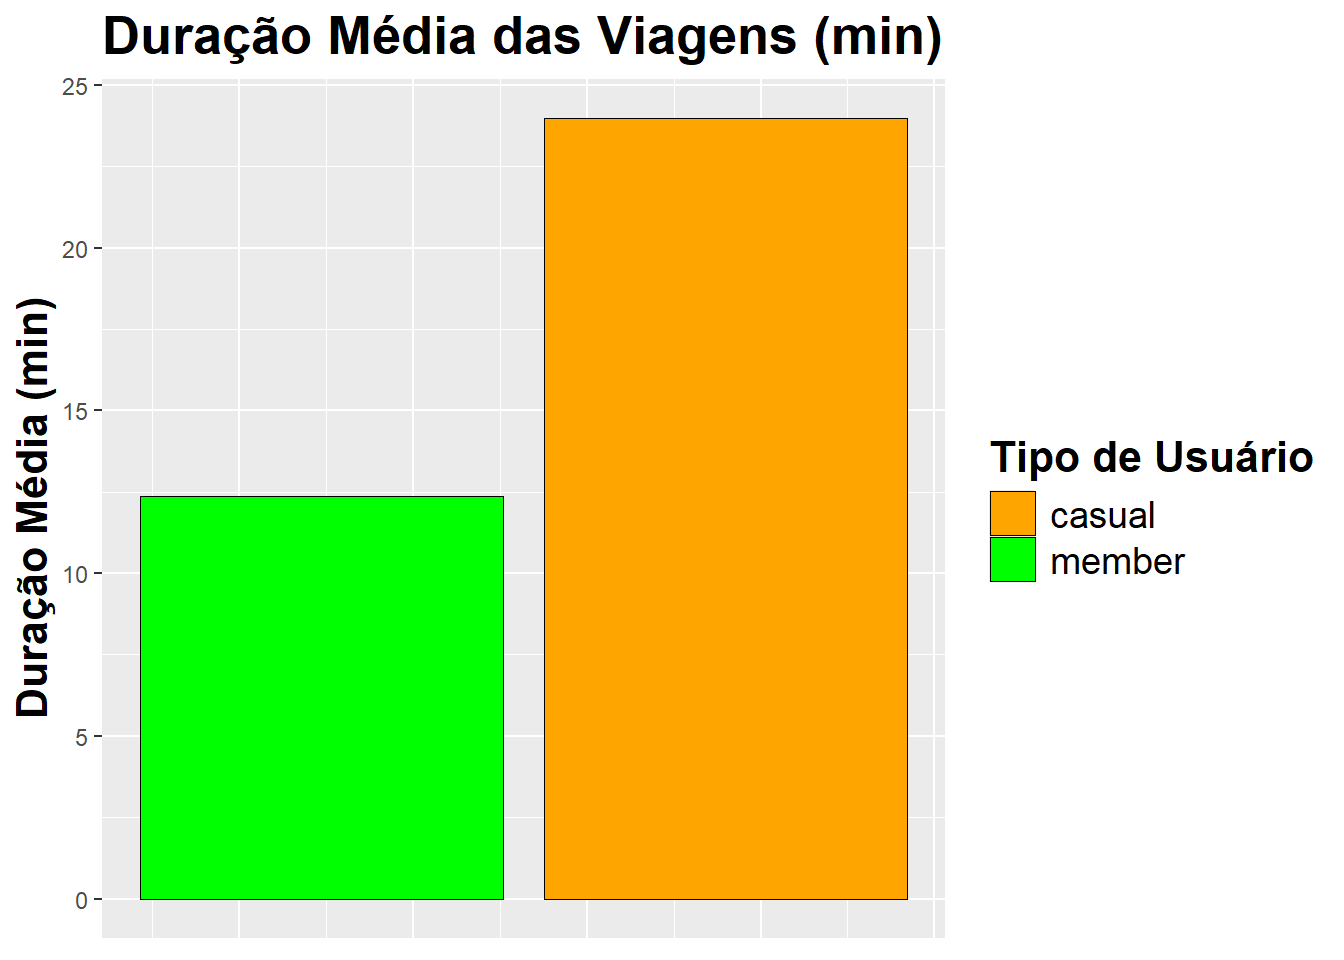

## Compartilhar

Nesta fase do estudo, estarei usando os dados obtidos ao longo do estudo
para desenvolver visualizações demonstrem os padrões de comportamento
dos usuários casuais e dos usuários membros da Cyclistic.

-   Qual a duração média das viagens de cada grupo? ok

-   Qual o número total de viagens de cada grupo? ok

-   Qual o percentual de viagens feitas por membros versus casuais? ok

-   Qual é o tipo de bicicleta que os clientes casuais mais usa? ok

-   Há diferenças no uso ao longo da semana? (Ex.: membros usam mais em
    dias úteis e casuais nos fins de semana?) ok

-   A duração média varia conforme os dias da semana ou meses do ano? ok

### Pergunta - Há diferenças no uso ao longo da semana? (Ex.: membros usam mais em dias úteis e casuais nos fins de semana?)

``` r
cyclistic_v2 %>%
  mutate(weekday = wday(started_at, label = TRUE)) %>%
  group_by(member_casual, weekday) %>%
  summarise(number_of_rides = n(),
            average_duration = mean(ride_length)) %>%
  arrange(member_casual, weekday) %>%
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Número de corridas x Tipo de usuário",  # Adicionando título
       x = "Dia da Semana", 
       y = "Número de Corridas", 
       fill = "Tipo de Usuário") +
  theme_minimal() +  # Melhorando o visual
  theme(plot.title = element_text(size = 10, face = "bold", hjust = 0.5))  # Centralizando título
```

    ## `summarise()` has grouped output by 'member_casual'. You can override using the
    ## `.groups` argument.

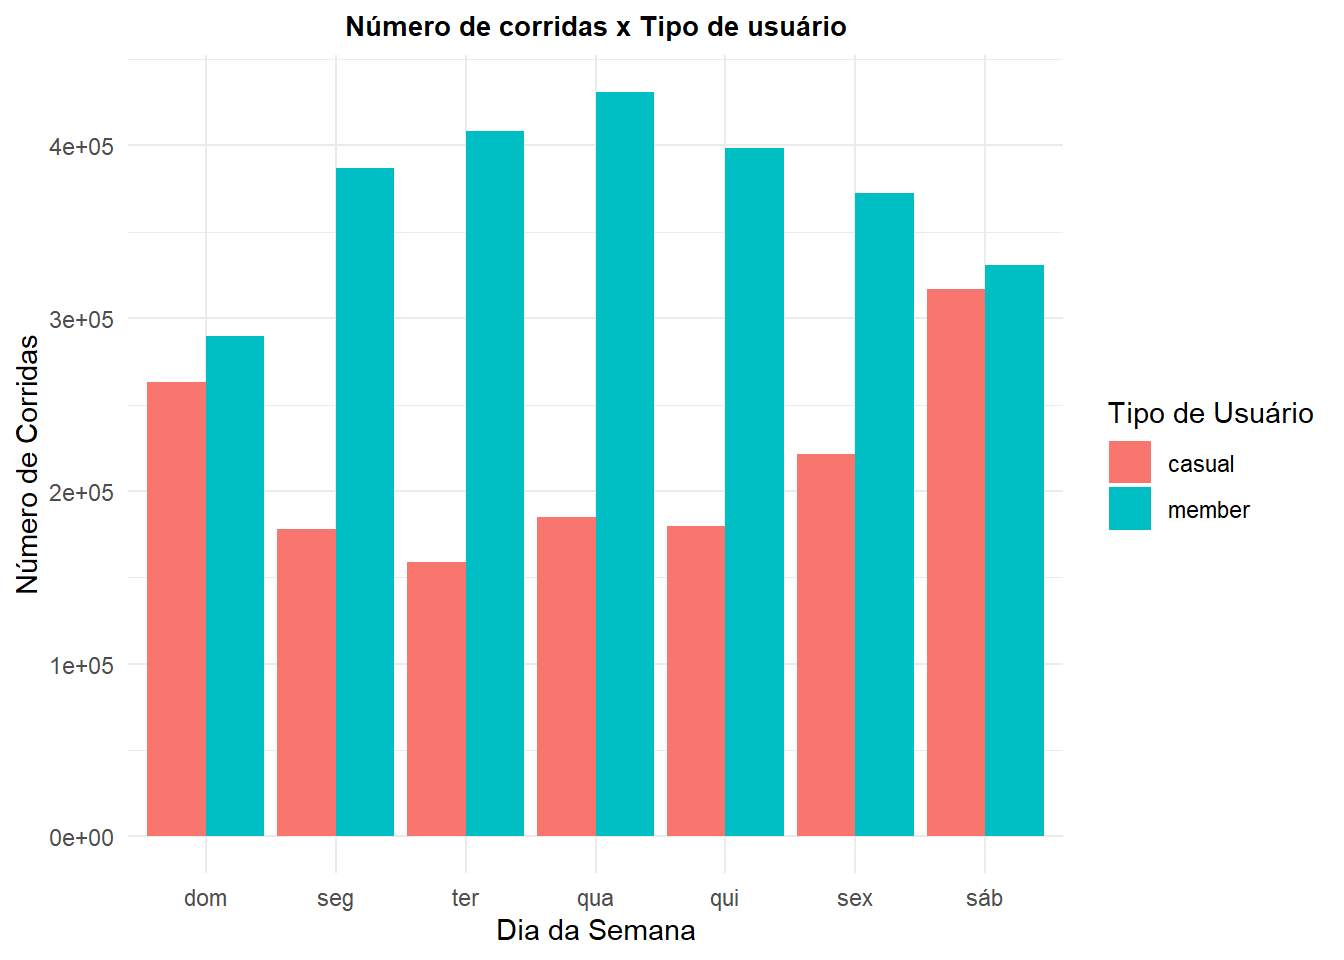

``` r
cyclistic_v2 %>%
  mutate(weekday = wday(started_at, label = TRUE)) %>%
  group_by(member_casual, weekday) %>%
  summarise(number_of_rides = n(),
            average_duration = mean(ride_length)) %>%
  arrange(member_casual, weekday) %>%
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Duração Média x Tipo de Usuário",  # Adicionando título
       x = "Dia da Semana", 
       y = "Duração Média (minutos)", 
       fill = "Tipo de Usuário") +
  theme_minimal() +  # Melhorando o design do gráfico
  theme(plot.title = element_text(size = 10, face = "bold", hjust = 0.5))  # Centralizando o título
```

    ## `summarise()` has grouped output by 'member_casual'. You can override using the
    ## `.groups` argument.

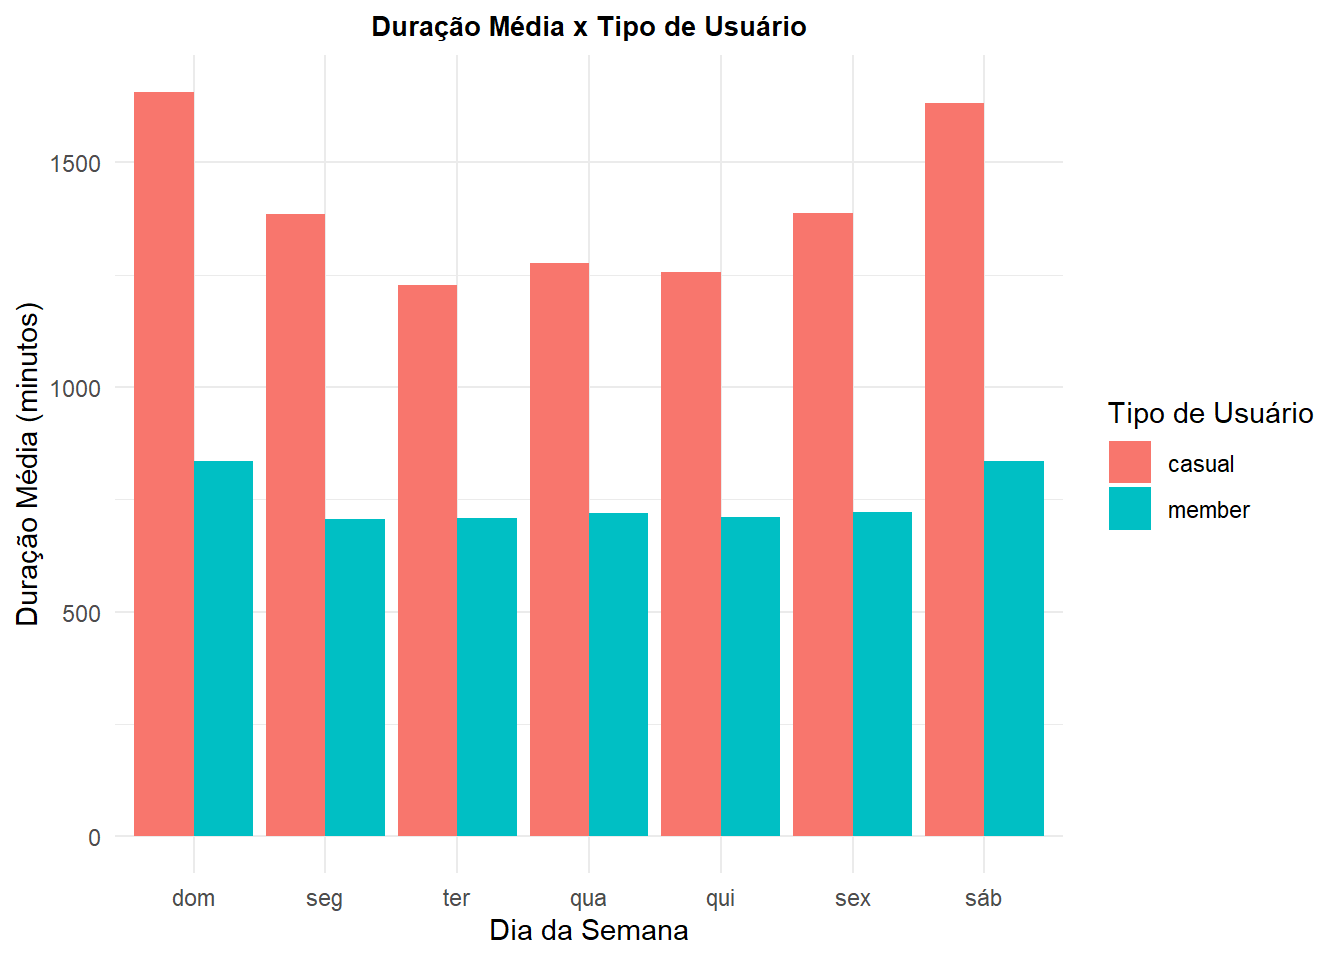

Análise

### Confrontando o número total de viagens de cada tipo de usuários

``` r
duracao_media <- cyclistic %>% 
  group_by(member_casual) %>% 
  summarise(num_viagens = length(ride_length), porcentual_viagens = (length(ride_length)/nrow(cyclistic))*100 )
print(duracao_media)
```

    ## # A tibble: 2 × 3
    ##   member_casual num_viagens porcentual_viagens
    ##   <chr>               <int>              <dbl>
    ## 1 casual            1502411               36.5
    ## 2 member            2618042               63.5

### Pergunta - Qual o percentual de viagens feitas por membros versus casuais?

``` r
ggplot(duracao_media, aes(x = "", y = porcentual_viagens, fill = member_casual)) +
    geom_col(color = "black", size = 0.7) +
    coord_polar("y", start = 0) +
    geom_text(aes(label = scales :: percent(porcentual_viagens/100)), position = position_stack(vjust = 0.5), size = 10, fontface = "bold") +
scale_fill_manual(values = c("seagreen3", "orange"), name = "Tipo de Usuário", labels = c("Usuario Casual", "Membro Anual")) +
labs(title = "Total de Viagens vs. Tipo de Usuário") +
theme_void() +
theme(plot.title = element_text(size = 10, face = "bold"),
    legend.title = element_text(size = 10, face = "bold",),
    legend.text = element_text(size = 10))
```

    ## Warning: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
    ## ℹ Please use `linewidth` instead.
    ## This warning is displayed once every 8 hours.
    ## Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
    ## generated.

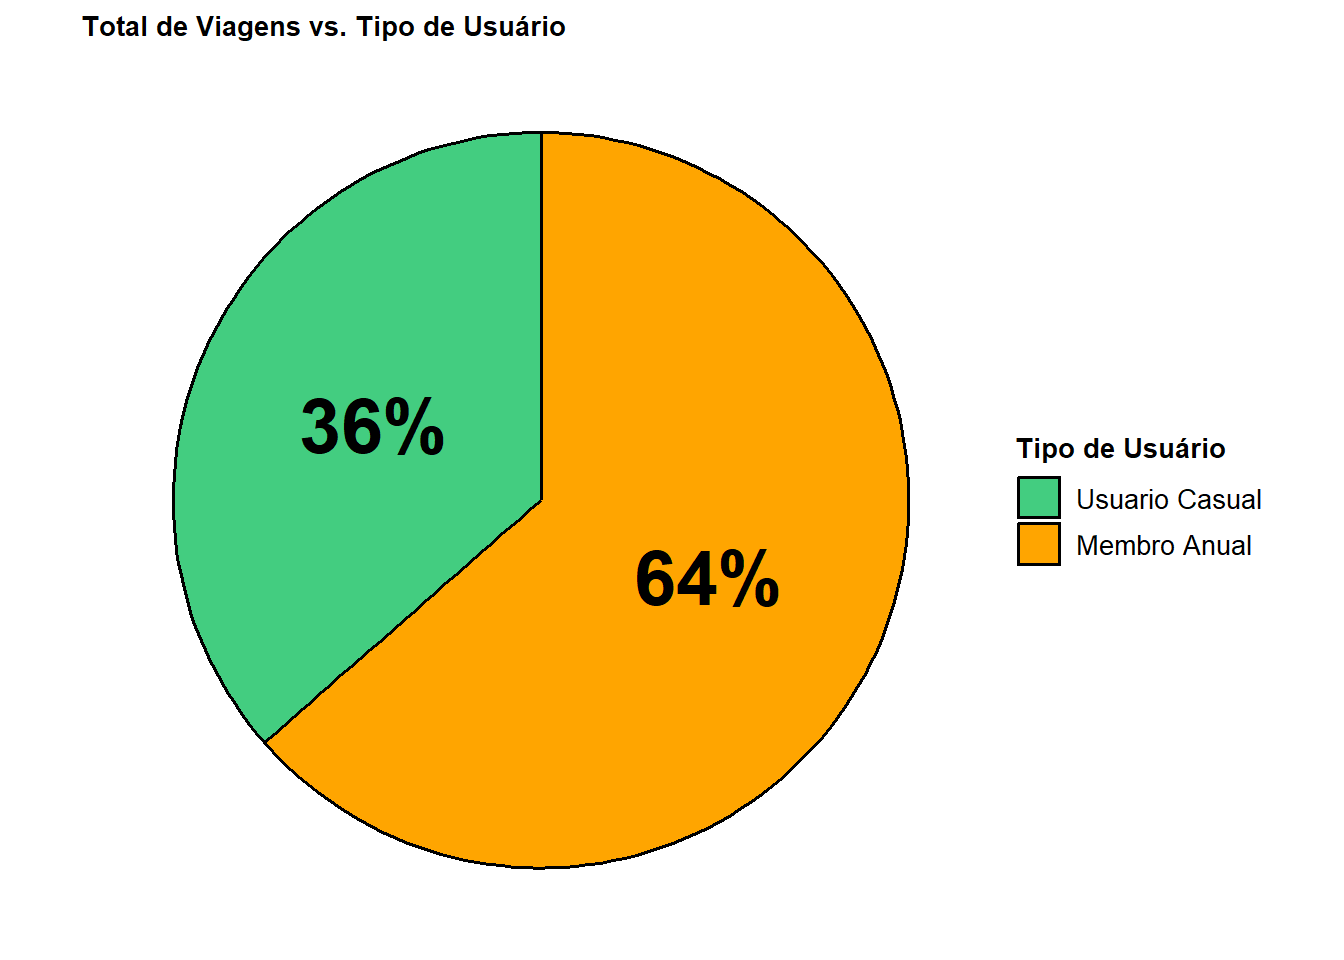

### Pergunta - Qual é o tipo de bicicleta que os clientes casuais mais usam?

``` r
ggplot(cyclistic %>% filter(member_casual == "casual") %>%
         group_by(rideable_type) %>%
         summarise(count = n()) %>%
         mutate(percentage = count / sum(count) * 100),  
       aes(x = rideable_type, y = percentage, fill = rideable_type)) +
  geom_col(color = "black", linewidth = 0.2) +  
  geom_text(aes(label = paste0(round(percentage, 1), "%")),  
            vjust = -0.5, size = 3, fontface = "bold") +  
  scale_fill_manual(values = c("dodgerblue", "firebrick", "seagreen")) +  
  labs(x = "Tipo de Bicicleta",
       y = "Porcentagem de Viagens (%)",
       title = "Uso de Bicicletas por Clientes Casuais (em %)",
       fill = "Tipo de Bicicleta") +
  theme_minimal() +
  theme(axis.title = element_text(size = 15, face = "bold"),
        plot.title = element_text(size = 10, face = "bold"),
        legend.title = element_text(size = 10, face = "bold"),
        legend.text = element_text(size = 10))
```

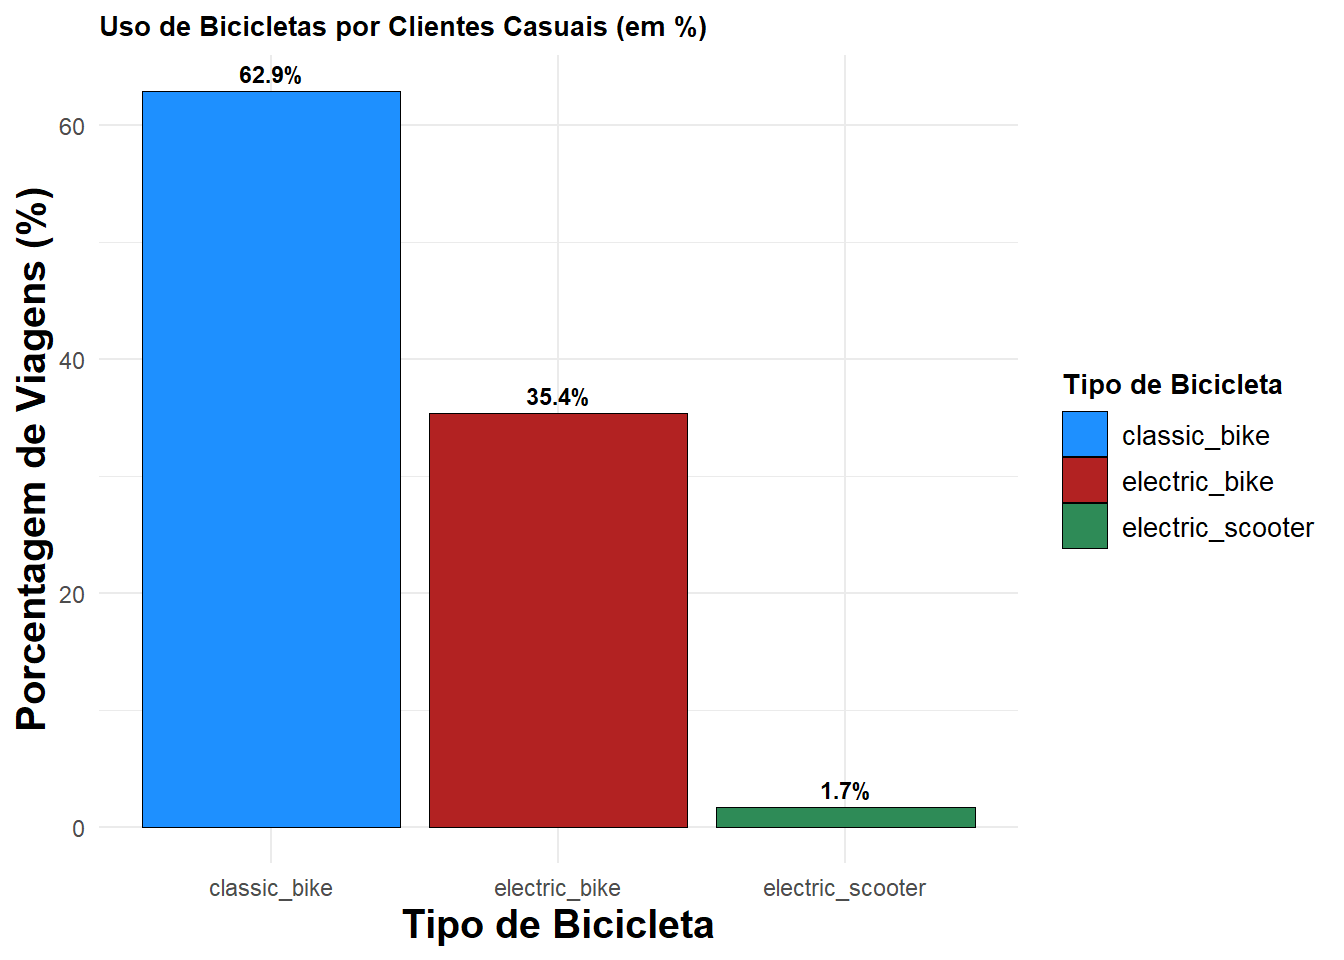

### Pergunta - A duração média varia conforme os dias da semana ou meses do ano?

``` r
duracao_media_mes <- cyclistic %>% 
  group_by(member_casual, month) %>% 
  summarise(duracao_media = mean(ride_length)/60, .groups = 'drop')
print(duracao_media_mes)
```

    ## # A tibble: 24 × 3
    ##    member_casual month duracao_media
    ##    <chr>         <chr>         <dbl>
    ##  1 casual        01             12.9
    ##  2 casual        02             13.4
    ##  3 casual        03             22.0
    ##  4 casual        04             24.8
    ##  5 casual        05             26.9
    ##  6 casual        06             26.5
    ##  7 casual        07             26.5
    ##  8 casual        08             24.8
    ##  9 casual        09             22.2
    ## 10 casual        10             22.4
    ## # ℹ 14 more rows

``` r
ggplot(duracao_media_mes, aes(x = month, y = duracao_media, fill = member_casual)) +
  geom_col(position = "dodge") +
  scale_fill_manual(values = c("seagreen3", "firebrick")) +
  labs(x= NULL, y = "Duração Média (min)", title = "Duração Média (min) vs. Mês", fill="Tipo de Usuário") +
  theme(axis.title.y = element_text(size = 15, face = "bold"),
       plot.title = element_text(size = 15, face = "bold"),
       legend.title= element_text(size = 10, face = "bold",),
       legend.text = element_text(size = 10))
```

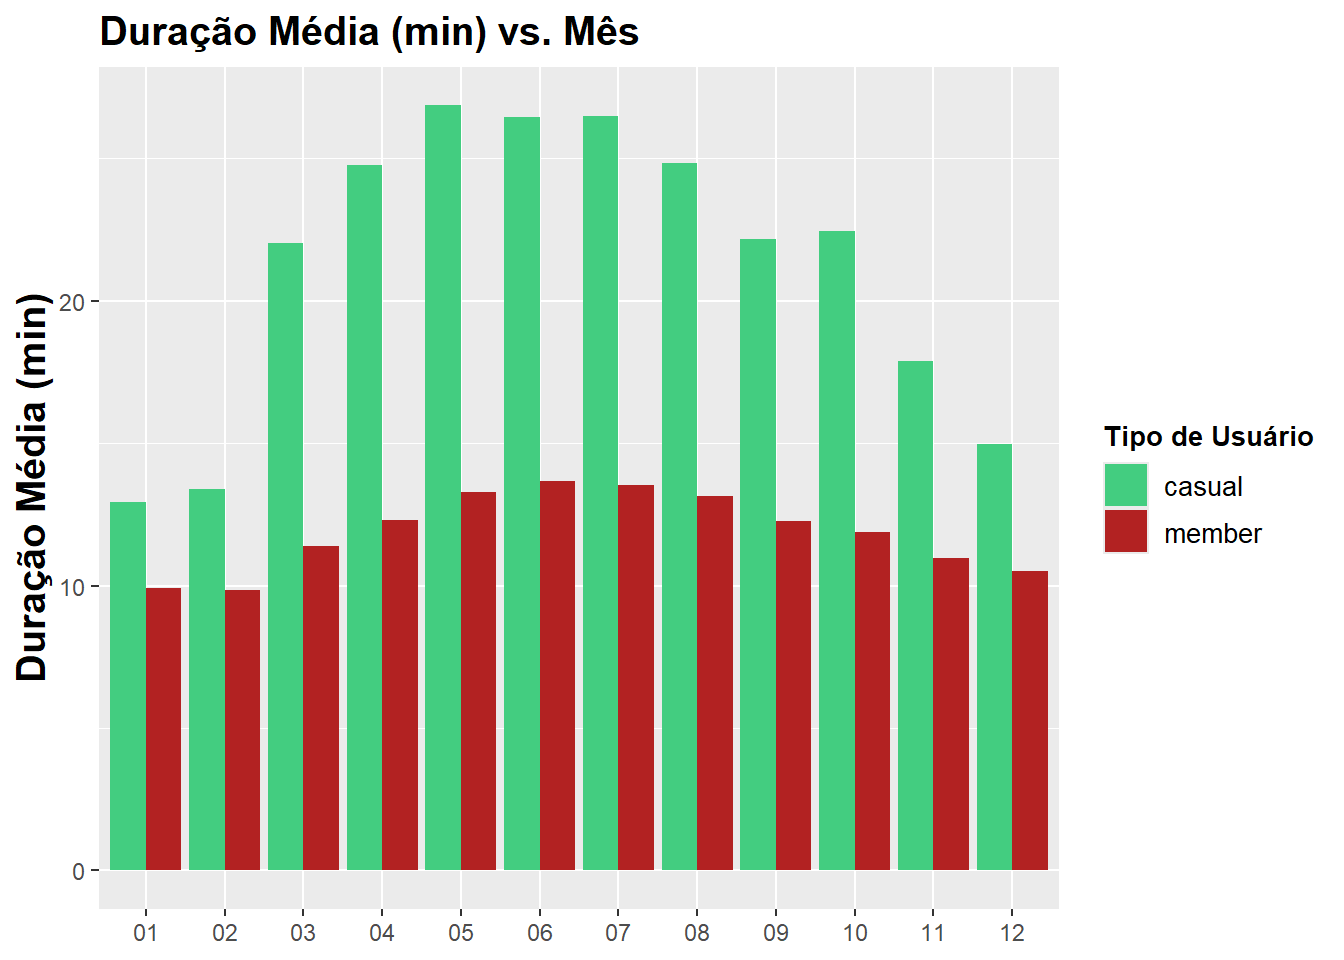

## Principais pontos a serem considerados:

### 1. Duração Média das Viagens

-   **Usuários Casuais**: Tendem a ter viagens mais longas,
    especialmente nos fins de semana e meses de clima favorável,
    sugerindo uso recreativo ou turístico.
-   **Membros Assinantes**: Apresentam viagens mais curtas e
    consistentes ao longo da semana e do ano, indicando uso para
    deslocamentos regulares.

### 2. Número de Viagens

-   **Membros Assinantes**: Realizam a maioria das viagens (64%),
    mostrando que são o grupo mais ativo e consistente.
-   **Usuários Casuais**: Representam 36% das viagens, com picos de uso
    nos fins de semana, indicando um padrão de uso mais esporádico e
    recreativo.

### 3. Preferência por Tipos de Bicicletas

-   **Bicicletas Clássicas**: São as mais utilizadas por usuários
    casuais (62,9%), provavelmente devido à familiaridade e conforto.
-   **Bicicletas Elétricas**: Representam 35,4% do uso, indicando uma
    preferência significativa por uma opção mais rápida e menos
    cansativa.
-   **Patinetes Elétricos**: Têm uso mínimo (1,7%), sugerindo menor
    popularidade ou disponibilidade.

### 4. Variação Mensal

-   **Usuários Casuais**: A duração média das viagens aumenta em meses
    específicos, como verão, indicando maior uso para atividades
    recreativas durante períodos de clima agradável.
-   **Membros Assinantes**: Mantêm uma duração média estável ao longo do
    ano, refletindo uso consistente para deslocamentos diários.

### 5. Oportunidades de Conversão

-   **Fins de Semana e Meses de Pico**: Como os usuários casuais já
    utilizam o serviço ativamente nesses períodos, campanhas de
    marketing direcionadas podem incentivá-los a se tornarem membros
    assinantes.
-   **Incentivos para Uso Durante a Semana**: Oferecer passes
    promocionais ou descontos para dias úteis pode ajudar a converter
    usuários casuais em membros.

### 6. Estratégias de Marketing

-   **Campanhas Temáticas**: Desenvolver campanhas que destacam os
    benefícios financeiros e de conveniência de ser um membro assinante.
-   **Programas de Fidelidade**: Implementar programas que recompensem o
    uso frequente, incentivando a conversão de usuários casuais.

### 7. Feedback e Melhorias

-   **Pesquisas de Satisfação**: Coletar feedback para entender as
    necessidades e objeções dos usuários casuais, ajustando as
    estratégias conforme necessário.
-   **Melhoria Contínua**: Aumentar a disponibilidade de bicicletas
    elétricas e patinetes, e melhorar a experiência do usuário com base
    no feedback.

## Conclusão

Os gráficos revelam que os usuários casuais têm um padrão de uso
distinto, com viagens mais longas e esporádicas, especialmente nos fins
de semana e meses de clima favorável. A Cyclistic pode aproveitar essas
informações para desenvolver estratégias de marketing e ofertas
personalizadas que incentivem a conversão de usuários casuais em membros
assinantes, aumentando assim a base de clientes fiéis e a lucratividade
da empresa.

## Agir

### Ações propostas para a Cyclistic:

-   Passeios exclusivos para membros, criando uma comunidade engajada e
    atraindo mais usuários casuais.

-   Relatos reais de assinantes falando sobre a experiência e as
    vantagens

-   Um plano mais barato que dá acesso ilimitado às bikes apenas nos
    finais de semana. Como muitos casuais usam as bicicletas nesses
    dias, pode ser um incentivo para testar a assinatura

-   Usuários casuais poderiam experimentar a assinatura anual por um mês
    com um preço reduzido

-   Criar desafios semanais e mensais com prêmios para engajar usuários
    membros do plano anual

\`\`\`